# Demonstrate the use of the Elbow Curve method in portfolio management 

1. Choose any SA Equity portfolio - we'll use the Bateleur BCI SA Equity (A1)
2. The objecive is to find the optimal number of assets that this portfolio can hold. 

# Import the necessary packages

In [2]:
import pandas as pd
import numpy as np
import warnings
import yfinance as yf

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
pd.options.display.precision = 4
# plt.style.use('seaborn-ticks')

# Download the data

In [7]:
# Date range
start = '2024-01-01'
end = '2024-12-31'

# Tickers of assets
assets = asset_classes = pd.read_csv("assets_sample9.csv").sort_values(by = ["Assets"])

assets = list(asset_classes["Assets"])

# market_index = ['^J433.JO']

all_assets = assets 
all_assets.sort()

# Downloading data
data = yf.download(all_assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = all_assets

[*********************100%***********************]  9 of 9 completed


# Calculate the returns

In [8]:
# Calculating returns

Y = data[all_assets].pct_change().dropna()

display(Y.head())

,AFT.JO,ARL.JO,ART.JO,COH.JO,KAL.JO,LBR.JO,NVS.JO,PMR.JO,RNI.JO
Date,,,,,,,,,
2024-01-03 00:00:00+00:00,-0.0258,0.0153,0.0027,-0.0231,0.0000,-0.0029,0.0227,-0.0002,-0.0226
2024-01-04 00:00:00+00:00,0.0026,-0.0133,0.0133,0.0327,-0.0057,0.0000,-0.0222,0.0000,0.0028
2024-01-05 00:00:00+00:00,-0.0240,0.0085,0.0000,0.0044,0.0000,-0.0544,0.0091,-0.0233,-0.0083
2024-01-08 00:00:00+00:00,0.0177,0.0128,-0.0033,0.0359,-0.0050,-0.0030,-0.0090,0.0081,-0.0055
2024-01-09 00:00:00+00:00,0.0137,0.0008,0.0053,-0.0017,0.0000,0.0638,0.0114,0.0000,-0.0067


# Calculate the standard deviation (as a rsik measure) and compute the expected risks.

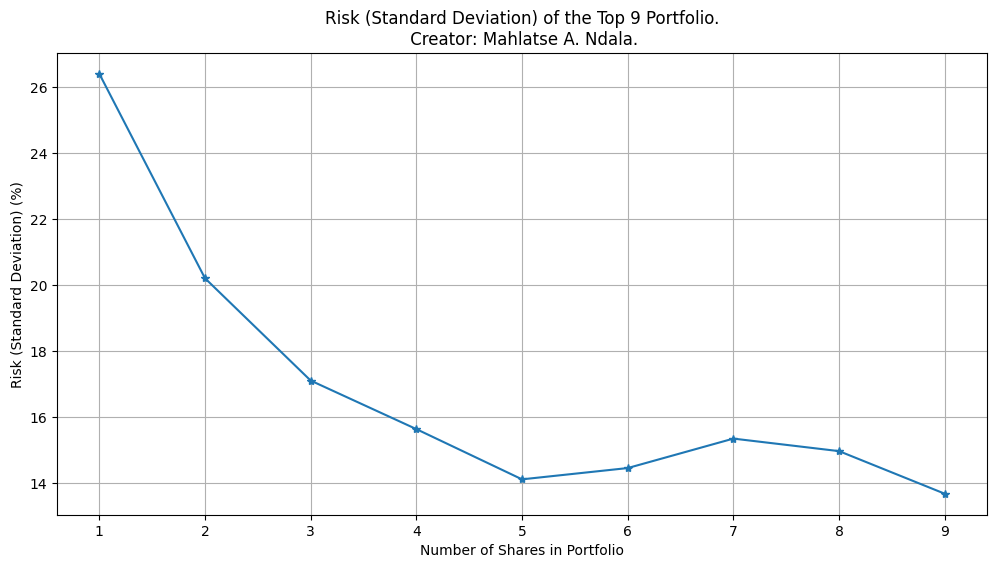

1    26.395
2    20.195
3    17.093
4    15.622
5    14.099
6    14.441
7    15.334
8    14.954
9    13.663
dtype: float64

In [10]:
import matplotlib.pyplot as plt

def calculate_stdev_different_portfolios(data):

    """
    Calculate standard deviation for portfolios with increasing numbers of shares and visualize the results.

    Args:
    shares_symbols (list): A list of shares symbols

    Returns:
    Series: Series containing the standard deviation for portfolios with increasing numbers of shares.
    """

    # Dictionary to hold expected standard deviation of portfolios
    sd = {}

    # Define number of shares in each portfolio
    number_of_shares = np.arange(1, len(Y.columns)+1)

    # Iterate through each portfolio
    for num_shares in number_of_shares:
        # Create equal weights for each constituent in the data
        weights = np.full(num_shares, 1/num_shares)

        # Extract data from whole dataset
        shares_data_subset = Y.iloc[:, :num_shares]

        # Create covariance matrix
        cov_mat = shares_data_subset.cov()

        # Calculate annual covariance matrix
        cov_mat = cov_mat * 252

        # Calculate expected portfolio volatility
        expected_portfolio_variance = weights.T.dot(cov_mat).dot(weights)
        expected_portfolio_std_dev = np.sqrt(expected_portfolio_variance)

        # Store in dictionary
        sd[num_shares] = round(expected_portfolio_std_dev * 100, 3)

    std_dev_of_different_portfolios = pd.Series(sd)

    # Plot standard deviations
    plt.figure(figsize=(12, 6))
    plt.plot(std_dev_of_different_portfolios.index, std_dev_of_different_portfolios.values, marker='*', linestyle='-')
    plt.title('Risk (Standard Deviation) of the Top 9 Portfolio.\n Creator: Mahlatse A. Ndala.')
    plt.xlabel('Number of Shares in Portfolio')
    plt.ylabel('Risk (Standard Deviation) (%)')
    plt.grid(True)
    plt.show()

    return std_dev_of_different_portfolios[:40]

#checking the elbow curve
elbow_curve = calculate_stdev_different_portfolios(data)
elbow_curve